In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('advertising.csv')
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Text(0.5, 1.0, 'Sales vs newspaper spend')

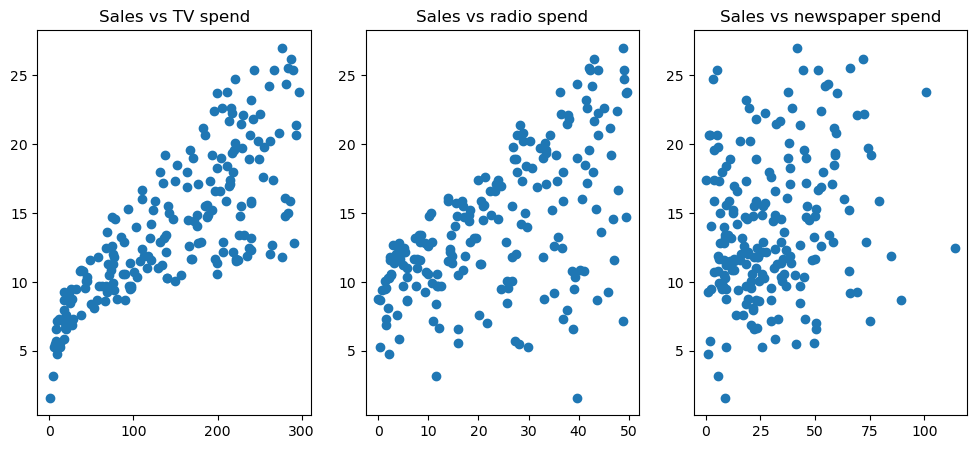

In [106]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_title('Sales vs TV spend')


axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Sales vs radio spend')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Sales vs newspaper spend')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

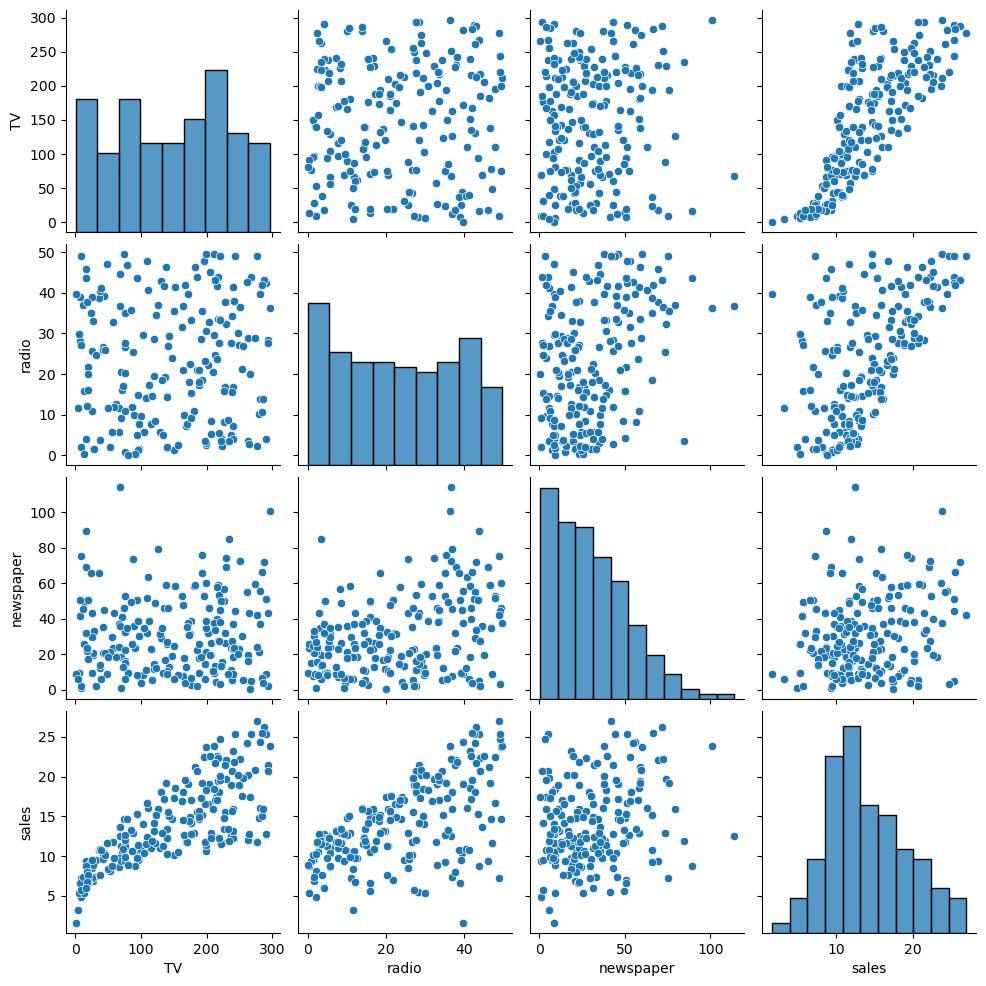

In [107]:
sns.pairplot(df)

In [108]:
#Separate features and Labels
X = df.drop('sales',axis=1)
y=df['sales']

In [109]:
#Train Test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3, random_state=50)

In [110]:
#Create and train a model
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [111]:
y_pred = mod.predict(X_test)

In [112]:
y_pred

array([13.87057718, 15.01552826, 10.55180271, 10.07071504, 10.17600154,
       18.45701851, 15.37849144,  3.44598251, 20.59883602, 11.94758021,
       15.10389107, 12.85162114, 21.15674861, 14.37943082, 15.99557741,
       16.96289139, 10.26390561, 16.80769543,  9.52691851, 12.50298739,
       16.88527161, 10.13256425,  8.02741222, 13.99812353, 21.36227455,
       14.20729858,  7.17409258,  7.53092545, 15.44601148, 13.61548538,
       14.89178416, 10.20777307, 11.92349927, 16.42370583,  6.54273265,
        9.59084638, 12.98377482, 20.54977003,  9.12170429, 11.28302445,
        7.2575045 , 24.65775515,  9.76584517, 18.27978451, 16.58342362,
       12.02457583, 12.4297889 , 16.14047754,  8.7397192 ,  7.78882132,
       12.1777782 , 12.06420435, 14.38530375, 10.45183742, 17.5957909 ,
       16.70030328, 16.46483663,  3.50361421, 23.23901517, 13.22526546,
       15.08696395, 17.11550335,  4.3810752 , 13.90878295, 19.45990068,
       12.75368687, 13.54281849])

In [113]:
y_test

112    14.1
165    11.9
12      9.2
73     11.0
144    11.4
       ... 
76      6.9
122    11.6
142    20.1
57     13.2
161    13.3
Name: sales, Length: 67, dtype: float64

### Model Performance on Test Set

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
df['sales'].mean()

14.0225

In [116]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [117]:
MAE

1.214660914295371

In [118]:
MSE

2.5582837836980024

In [119]:
RMSE

1.5994635924890577

In [120]:
1.22/14

0.08714285714285715

In [121]:
RMSE/14  #Generally, it should be atleast less than 5%

0.11424739946350412

#### Plotting Residuals

In [122]:
test_residuals = y_test-y_pred
test_residuals

112    0.229423
165   -3.115528
12    -1.351803
73     0.929285
144    1.223998
         ...   
76     2.518925
122   -2.308783
142    0.640099
57     0.446313
161   -0.242818
Name: sales, Length: 67, dtype: float64

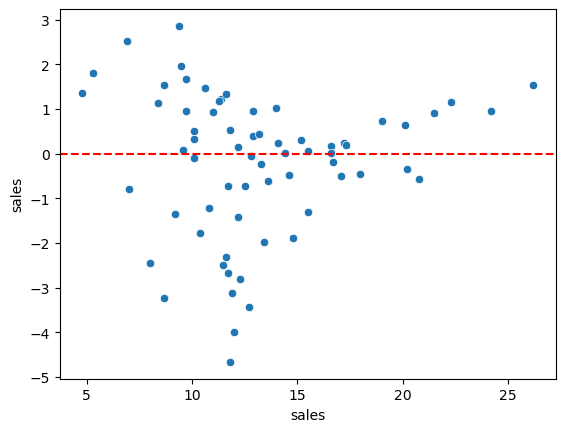

In [123]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

In [124]:
len(test_residuals)

67

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Count'>

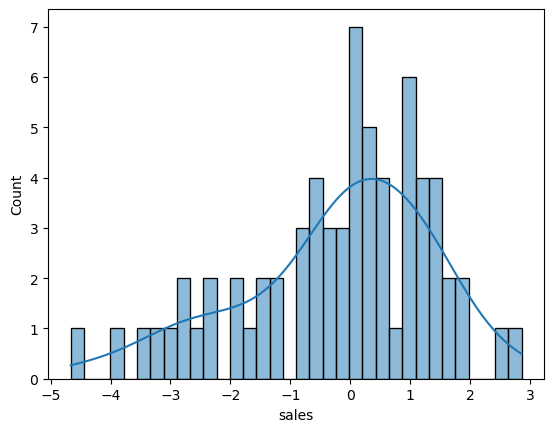

In [125]:
sns.histplot(test_residuals,bins=34,kde=True)

#### Retrain the Model on entire Dataset

In [126]:
final_model = LinearRegression()

In [127]:
final_model.fit(X,y)

LinearRegression()

In [129]:
y_hat = final_model.predict(X)

In [131]:
len(y_hat)

200

Text(0.5, 1.0, 'Sales vs newspaper spend')

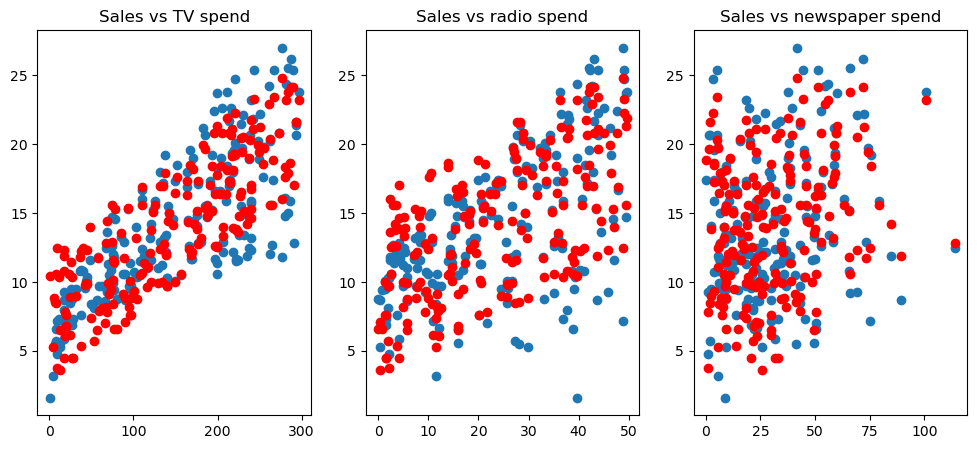

In [132]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_title('Sales vs TV spend')


axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title('Sales vs radio spend')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title('Sales vs newspaper spend')

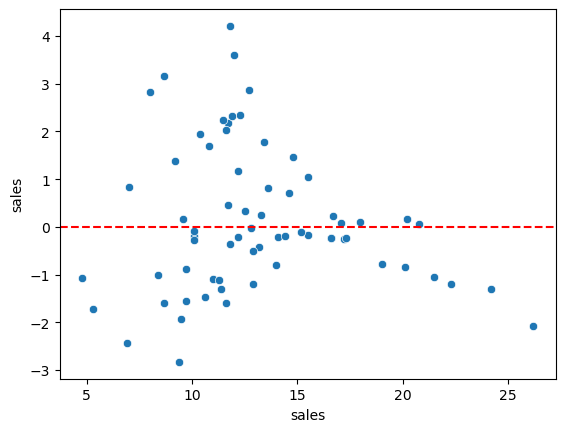

In [133]:
res = y_hat-y
sns.scatterplot(x=y_test,y=res)
plt.axhline(y=0,color='red',ls='--')

In [134]:
#coefficients

final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

###
1. keeping all other features fixed, a unit increase in TV spend is associated with an increase of .045 'sales units'
2. keeping all other features fixed, a unit increase in radio spend is associated with an increase of .188 'sales units'
3. keeping all other features fixed, a unit increase in newspaper spend is associated with an decrease of .001 'sales units'


### Prediction on New Data

In [138]:
campaign = [[149,21,18],[149,21,1000]]

final_model.predict(campaign)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.69827702, 12.67945886])

### Saving and Loading a Model

In [139]:
from joblib import dump, load

In [140]:
dump(final_model,'sales_model_mmlp.joblib')

['sales_model_mmlp.joblib']

In [141]:
loaded_model = load('sales_model_mmlp.joblib')

In [142]:
loaded_model.predict([[121,123,12]])

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.65315363])